This notebook contains the project for Complex system simulation, Complex financial networks

In [1]:
# imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys
import os
import time
import datetime
import pickle
import argparse
import itertools
from typing import Dict, List, Any, Tuple
import doctest
import pandas as pd
import powerlaw
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import custom_functions_adj_saving_func as cm

# Financial contract network

Agent (nodes) want to enter into contracts with other agents (Links) to reduce their risk exposure. We will simulate what happens over time, studying when a total system collapse becomes more likely to occur as a function of the size of perturbation to the system.

1. There are total of $N$ Agents (nodes) and the i'th agent will have an exposure $e_i$ which initialized as a random number between 1 and -1.

2. Agents try to minimize their exposure by forming a link to another agent with opposite expsure, meaning finding another node with the opposite sign of $e_i$, namely $e_j$ such that the sum of their exposures $\Sigma e$ is as close to 0 as possible. A link is formed if $\Sigma e$ is minimal, if $\Sigma e$ is above a threshold, $T_e$, such that $\Sigma e$ > $T_e$ no link will be formed. 

We have to options for the link weights- Option B: The link weight is equal to the previous exposure of the node, and links are always biirectional but carry different weights. Thus the link weights become: $W$ is a weight function, so that $W(L_{ij}) = e_{ij}$ and $W(L_{ji}) = e_{ji}$ 

3. Each timestep the exposure of an agent is a brownian motion. Agents have exposure to the price of stock. We assume all agents have exposure to the same asset for simplicity. 

Agents have total volatility $V$, which is $e$ times the prive movement $S$, $e * S = V$. If V $<$ or $>$ threshold value $T_v$, an agent becomes bankrupt and also dies (meaning the node gets removed). This causes all links $L_{ij}$ to be removed and the values of the weights $W_{L_{ij}}$ to be added $e_{j}$ which is the exposure of $N_{j}$, which then increases the chances of $e_{j} > T_e$ and $N_{j}$ dying as a result, causing the effect to propagate.

- Hypothesis is that an increased average move away from the mean causes a higher probability of default when the number of links is higher



Limitations: 
- Bank only link at most twice, which is unrealistic as banks have more transactions
- There is only 1 asset

Agents are willing to link if their summed exposure is small, because then it brings their new exposure closer to 0. The new exposure $E_{i_{t+1}}$ is a random draw between -1 and 1.

If a node cannot find any other node to link with (Due to threshold or or because there are simply no nodes to link with) 

then becomes $E_{i_{t}}$ + the column and row sums of the adjacency matrix. 

# Testing the Linking function 

# Extending the framework

We need logic to account for when a node dies and what then happens to the exposure of the other nodes, the function below does this:

# First run

In [2]:
# Parameters for the simulation
N_agents = 100
time_steps = 200# Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'exposure'



# running time 1 pass with these params: 900 seconds

# Running the simulator
graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = cm.financial_network_simulator(N_agents = N_agents, time_steps = time_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold, swap_exposure_threshold = swap_exposure_threshold, time_to_maturity = time_to_maturity , link_threshold_mode = link_threshold_mode, link_formation_mode = link_formation_mode, create_new_node_mode = create_new_node_mode, bankruptcy_mode = bankruptcy_mode)
# graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = financial_network_simulator(N_agents = N_agents, num_steps = num_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold)

timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep 79
timestep 80
timestep 81
timestep 82
timestep 83
ti

# Visual tests of network behavior

In [3]:
# params

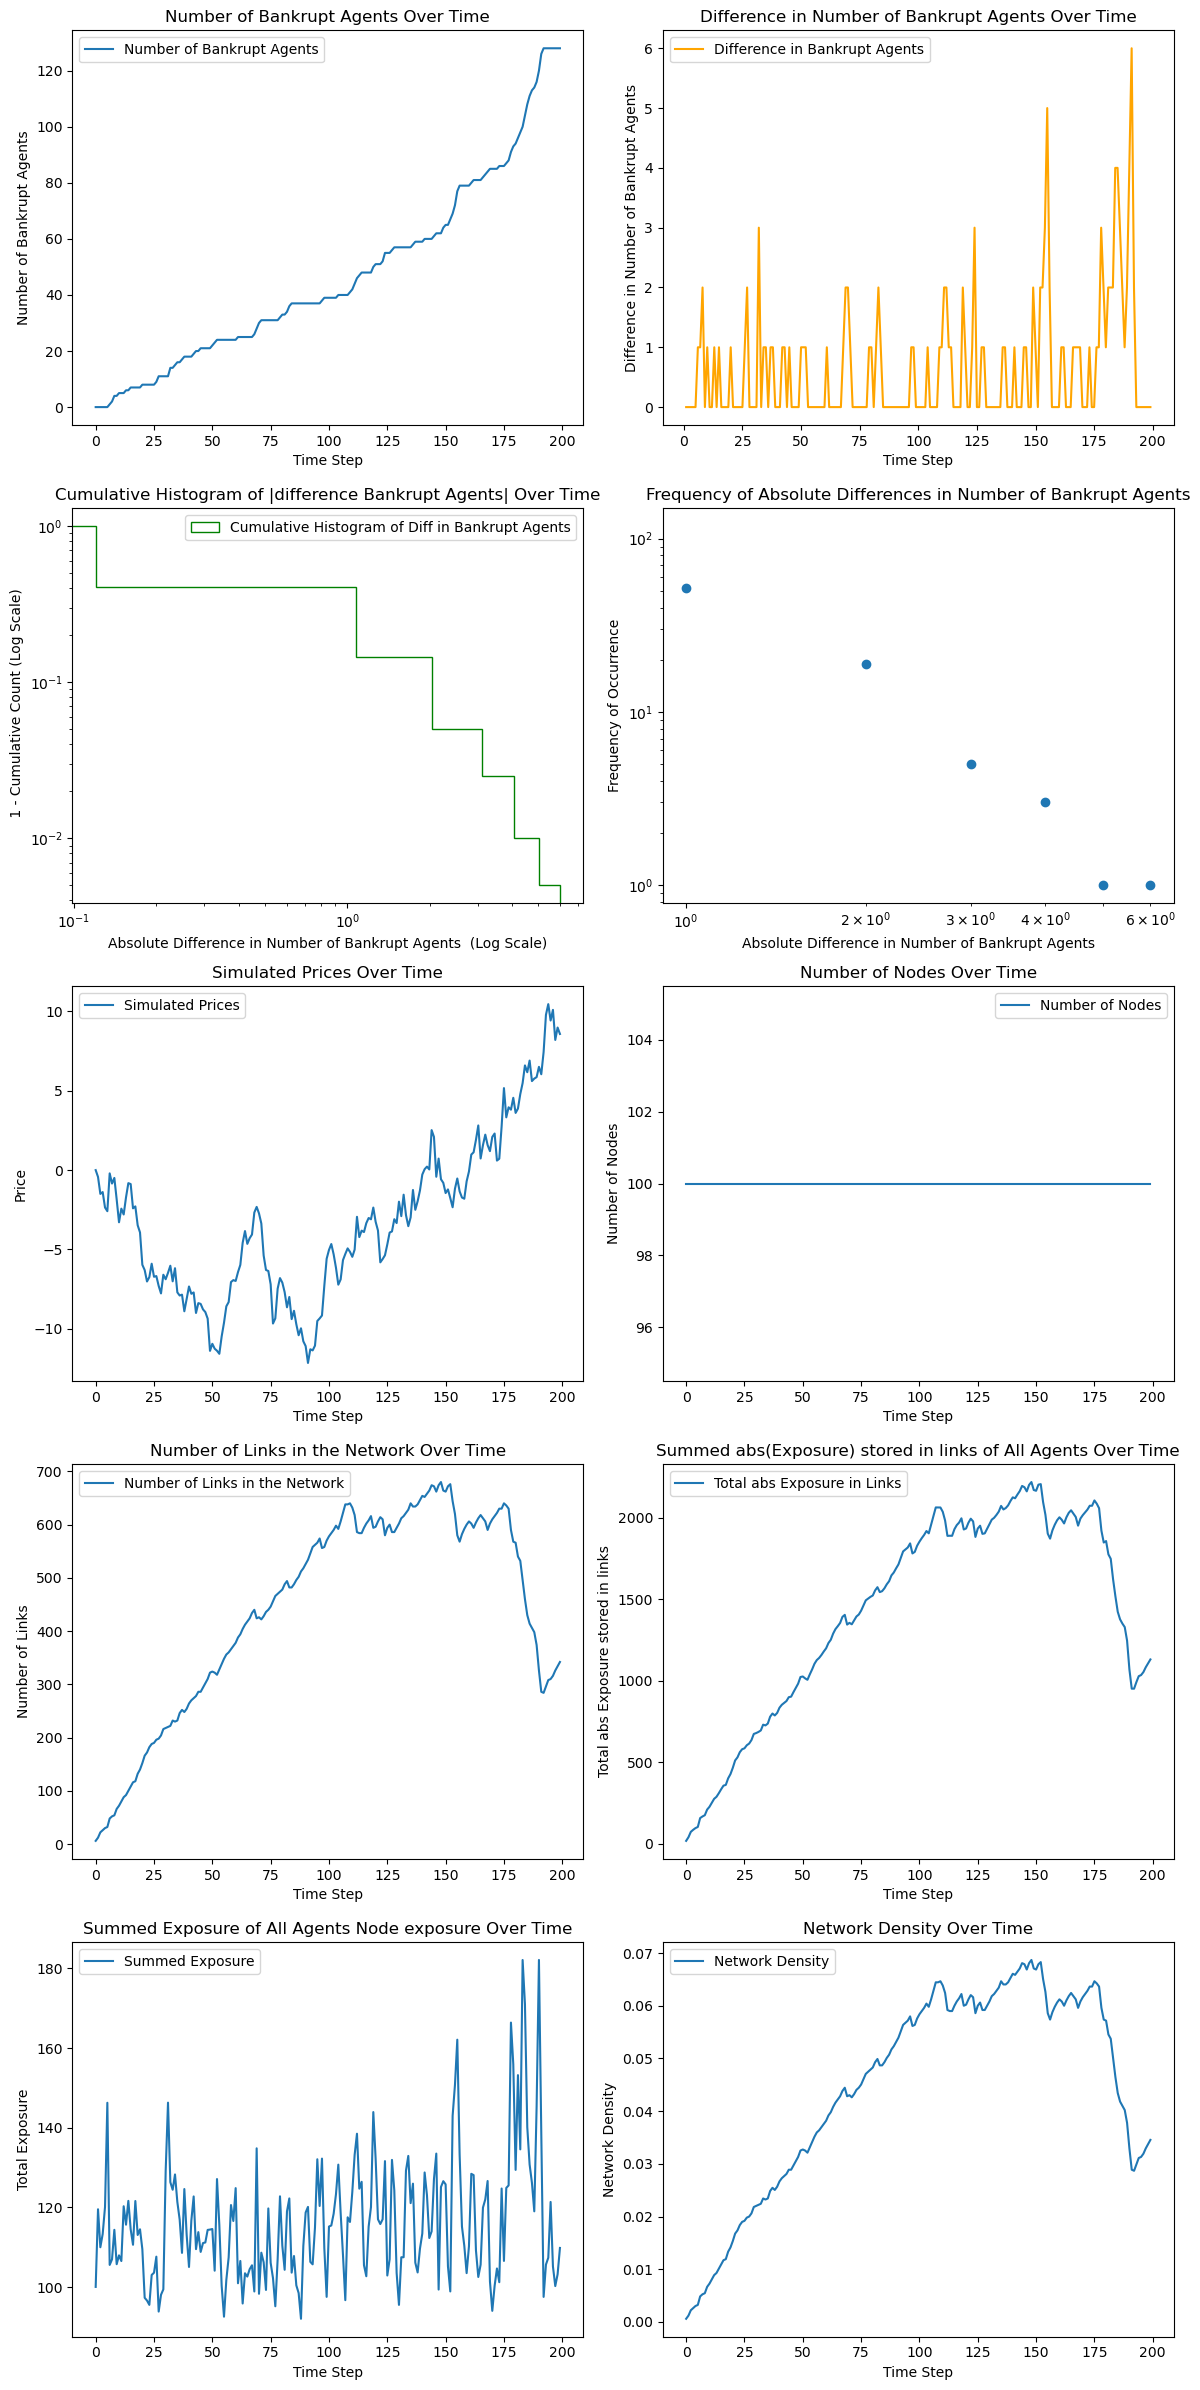

In [4]:
# num_bankrupt_agents_over_time, node_population_over_time, links_over_time, total_abs_exposure_in_edge_weights, exposures_over_time, simulated_prices
cm.plot_financial_network_results(num_bankrupt_agents_over_time= num_bankrupt_agents_over_time, node_population_over_time=node_population_over_time, links_over_time=links_over_time, total_abs_exposure_in_edge_weights=total_abs_exposure_in_edge_weights, exposures_over_time=exposures_over_time, simulated_prices=simulated_prices)

In [5]:
# in progress.. not yet done. Function for plot of experiment 3

def plot_3d_probability_default_surface(time_steps, prob_of_default, default_size, total_abs_exposure_in_edge_weights):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Creating grid values for interpolation
    X, Y = np.meshgrid(np.linspace(prob_of_default.min(), prob_of_default.max(), 100),
                       np.linspace(default_size.min(), default_size.max(), 100))
    
    # Interpolating Z values (total_abs_exposure_in_edge_weights) on the grid
    Z = griddata((prob_of_default, default_size), total_abs_exposure_in_edge_weights, (X, Y), method='linear')

    # Creating the surface plot
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    # Adding labels and title
    ax.set_xlabel('Probability of Default')
    ax.set_ylabel('Default Size')
    ax.set_zlabel('Max Abs Exposure')
    ax.set_title('3D Surface Plot of Probability of Default vs Default Size vs Max Abs Exposure')

    # Adding a color bar to represent total_abs_exposure_in_edge_weights
    cbar = plt.colorbar(surf)
    cbar.set_label('Max Abs Exposure')

    plt.show()

# Hypothesis tests


**Does the bankruptcy per step follow powerlaw distribution?**

Null Hypothesis (H0): The data follows an exponential distribution as well as or better than a power-law distribution.

Alternative Hypothesis (H1): The data follows a power-law distribution better than an exponential distribution.

In [6]:
diff_bankrupt_agents = np.diff(num_bankrupt_agents_over_time)

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


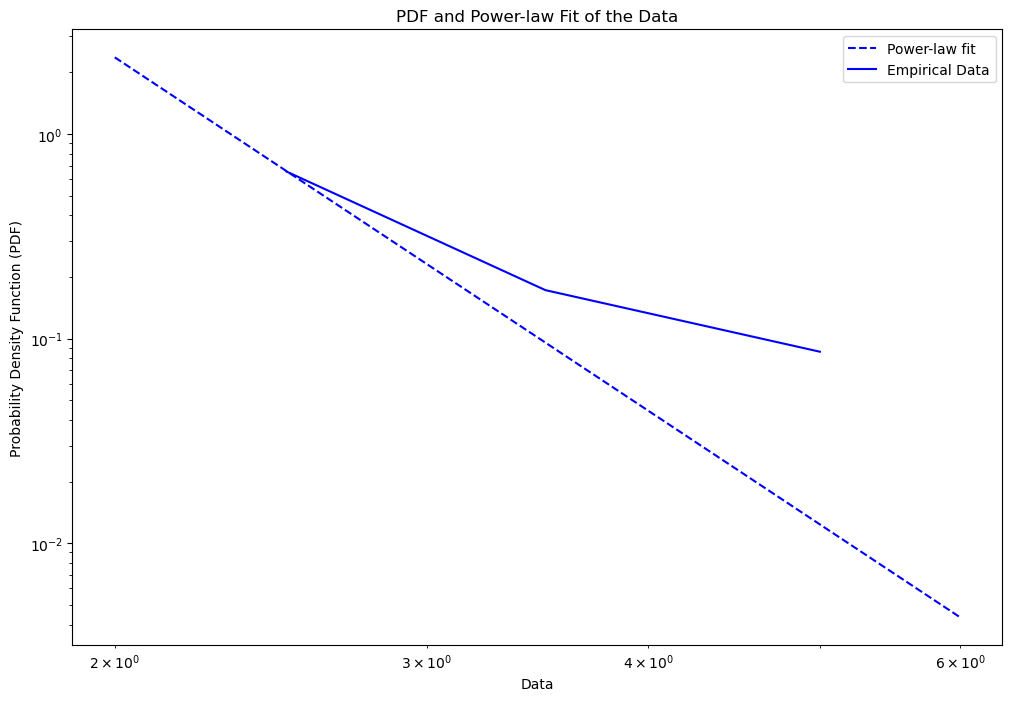

Power-law exponent (alpha): 5.7372693257206535
Loglikelihood ratio between power law and exponential distribution: 2.837916137101753
Statistical significance of the fit (p-value): 0.004540911165696527
The data follows a power-law distribution better than an exponential distribution.


(5.7372693257206535, 2.837916137101753, 0.004540911165696527)

In [7]:
cm.fit_power_law(np.abs(diff_bankrupt_agents))

# Multiple run simulator

In [8]:

# data_of_multirun = multi_parameter_financial_network_simulator(runs=10, N_agents_list=[200,500,1000,2000], num_steps_list=[2000], delta_t_list=[0.01], sigma_exposure_node_list = [0.2,0.5,1],  sigma_intrestrate_list = [16,32,50], threshold_v_list= [1,4,10], linking_threshold_list = [0.5,0.2,0.1,0.01])


In [9]:
N_agents = 100
time_steps = 200# Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'exposure'


# data_of_multirun = cm.multi_parameter_financial_network_simulator(runs=5, N_agents_list=[500,250,100], num_steps_list=[3000], delta_t_list=[0.01], sigma_exposure_node_list = [2],  sigma_intrestrate_list = [20,40,80], threshold_v_list= [2], linking_threshold_list = [2], swap_exposure_threshold_list = [2,10,50], time_to_maturity_list =[1], link_formation_mode = ['divide exposure singly'], create_new_node_mode = True, link_formation_mode = link_formation_mode ,bankruptcy_mode = 'exposure' )
 
data_of_multirun = cm.multi_parameter_financial_network_simulator(runs=2, N_agents_list=[100], num_steps_list=[200], delta_t_list=[1], sigma_exposure_node_list = [1],  sigma_intrestrate_list = [1], threshold_v_list= [2], linking_threshold_list = [2], swap_exposure_threshold_list = [2], time_to_maturity_list =[1], create_new_node_mode = True, link_formation_mode = link_formation_mode, bankruptcy_mode = 'exposure', link_threshold_mode_list = ['hard cutoff'] )
 

2024-01-30 23:27:58 - Progress: 2/2 (100.00%) - Estimated Time Remaining: 0:00:00
2024-01-30 23:28:00 - Progress: 3/2 (150.00%) - Estimated Time Remaining: -1 day, 23:59:59
Saved results to 100_200_1_1_1_2_2_2_1_hard cutoff_divide exposure singly_exposure_20240130232800.csv
Saved all results to simulation_results_divide exposure singly_exposure_20240130232800.csv


c:\Users\nitai\OneDrive\MScCLS\Complex system simulation\FinancialNetwork\custom_functions_adj_saving_func.py:898: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([combination_df, df], ignore_index=True)


In [ ]:
# Varying N_agents, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 5
N_agents = [100, 200, 300]
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

In [10]:
# Varying N_agents, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 5
N_agents = [100, 200, 300]
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

KeyboardInterrupt: 

In [11]:
# Varying sigma_exposure_node, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 5
N_agents = 100
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = [1, 2, 4]
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=sigma_exposure_node,  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

In [13]:
# Varying Threshold_v, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 5
N_agents = 100
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = [5, 10, 15]  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=threshold_v, 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

KeyboardInterrupt: 

In [ ]:
# Varying Threshold_v, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 5
N_agents = 100
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = [5, 10, 15]  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=threshold_v, 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

If time, vary time to maturity

In [ ]:
# Varying time to maturity, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 5
N_agents = 100
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = [200, 400, 600]
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=time_to_maturity, 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

In [ ]:
# Varying time to maturity, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 5
N_agents = 100
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = [200, 400, 600]
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=time_to_maturity, 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

# Exploratory Data Analysis Functions

# What we add in comparison to the paper Drupsteen 2019:

- we add a preferential attachment linking mechanism, meaning agens prefer to link with other agents such that the summed exposure is as close to 0 as possible.
- we add exposure to an external asset (intrest rate) instead of just merely looking at exposure. This allows moddeling the effect of price swings on the default cascade probability

# Experiments


In this part of the notebook, we conduct experiments to identify properties of the network. We want to conduct the following experiments

1. Look at the CDF avalanche sizes to see if it is powerlaw

1. Look at the distribution of avalanche sizes vs. system size, to see if it is powerlaw


2. Look at the probability of avalanche as a function of volatility of the price time series


3. Look at stress in the system vs. probability of avalanche vs. volatility of the asset


Possible run params experiment  1, 2 & 3:

data_of_multirun = multi_parameter_financial_network_simulator(runs=10, N_agents_list=[200,500,1000,2000], num_steps_list=[2000], delta_t_list=[0.01], sigma_exposure_node_list = [0.2,0.5,1],  sigma_intrestrate_list = [16,32,50], threshold_v_list= [1,4,10], linking_threshold_list = [0.5,0.2,0.10,0.01])


5. Look at multiple thresholding functions to compare
